In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Mengambil data
from sklearn.datasets import load_breast_cancer

In [3]:
# Memuat data
data = load_breast_cancer()

In [4]:
#mengecheck tipe data
type(data)

sklearn.utils.Bunch

In [5]:
# nb : ini adalah bunch object
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
#dimensi
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
#library memabntu dalam membagi data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
#Standarisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Membangun model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training data
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluasi model dengan loss dan akurasi
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 4s 42ms/step - loss: 0.2825 - accuracy: 0.9213 - val_loss: 0.2661 - val_accuracy: 0.9521
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2653 - accuracy: 0.9213 - val_loss: 0.2481 - val_accuracy: 0.9521
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2506 - accuracy: 0.9213 - val_loss: 0.2326 - val_accuracy: 0.9521
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 0.2378 - accuracy: 0.9291 - val_loss: 0.2195 - val_accuracy: 0.9521
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2268 - accuracy: 0.9318 - val_loss: 0.2080 - val_accuracy: 0.9521
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2174 - accuracy: 0.9370 - val_loss: 0.1976 - val_accuracy: 0.9574
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2087 - accuracy: 0.9370 - val_loss: 0.1887 - val_accuracy: 0.9628
Epoch 

12/12 [==============================] - 0s 17ms/step - loss: 0.0985 - accuracy: 0.9764 - val_loss: 0.0795 - val_accuracy: 0.9894
Epoch 58/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0980 - accuracy: 0.9764 - val_loss: 0.0789 - val_accuracy: 0.9894
Epoch 59/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0973 - accuracy: 0.9764 - val_loss: 0.0784 - val_accuracy: 0.9894
Epoch 60/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0967 - accuracy: 0.9764 - val_loss: 0.0779 - val_accuracy: 0.9894
Epoch 61/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0961 - accuracy: 0.9764 - val_loss: 0.0773 - val_accuracy: 0.9894
Epoch 62/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0956 - accuracy: 0.9764 - val_loss: 0.0769 - val_accuracy: 0.9894
Epoch 63/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0951 - accuracy: 0.9764 - val_loss: 0.0763 - val_accuracy: 0.9894
Epoch 64/100

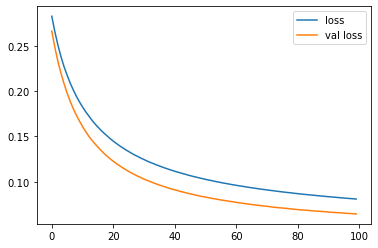

In [15]:
# plot hasil model.fit() grafik loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

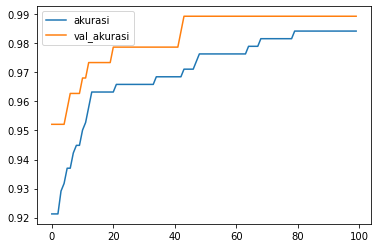

In [16]:
#grafik plot akurasi
plt.plot(r.history['accuracy'], label='akurasi')
plt.plot(r.history['val_accuracy'], label='val_akurasi')
plt.legend()

## Part 2 : Membuat Prediksi

In [18]:
# Membuat prediksi
P = model.predict(X_test)
print(P) #Output dari sigmoid, Mengintepretasikan probability p(y = 1 | x)

[[9.92282927e-01]
 [1.27753317e-02]
 [9.87646043e-01]
 [3.03657900e-04]
 [9.37157810e-01]
 [2.63434917e-01]
 [9.05032635e-01]
 [9.76005256e-01]
 [4.36760238e-05]
 [9.99581754e-01]
 [9.99971390e-01]
 [9.90316212e-01]
 [4.39239591e-01]
 [9.77392852e-01]
 [6.42989122e-04]
 [7.33968735e-01]
 [9.95523897e-06]
 [1.21513964e-04]
 [4.78361873e-03]
 [1.12325733e-03]
 [1.76352076e-02]
 [2.20771506e-01]
 [8.89404118e-01]
 [9.96171772e-01]
 [9.94883597e-01]
 [8.76957059e-01]
 [1.20619541e-08]
 [8.47278989e-06]
 [9.85493124e-01]
 [6.07496798e-01]
 [7.73942530e-01]
 [6.39945711e-07]
 [9.99131858e-01]
 [9.98897791e-01]
 [9.51610148e-01]
 [9.70709801e-01]
 [2.98272676e-06]
 [9.97961998e-01]
 [4.01009951e-04]
 [9.97960091e-01]
 [5.64925373e-03]
 [3.85360181e-01]
 [3.60020408e-06]
 [1.14911445e-05]
 [9.84187484e-01]
 [9.89480257e-01]
 [9.99655485e-01]
 [9.70558524e-01]
 [9.98871982e-01]
 [9.93206382e-01]
 [4.72181886e-02]
 [2.60832667e-01]
 [9.79389012e-01]
 [3.22406304e-05]
 [9.88823354e-01]
 [3.738399

In [19]:
#Pembulatan untuk mendapatkan prediksi sebenarnya
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]


In [20]:
# Perhitungan dari akurasi, membandingkan dengan hasil evaluasi
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 8ms/step - loss: 0.0646 - accuracy: 0.9894
Evaluate output: [0.06461134552955627, 0.9893617033958435]
